<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_autoregressive_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [43]:
np.arange(5)

array([0, 1, 2, 3, 4])

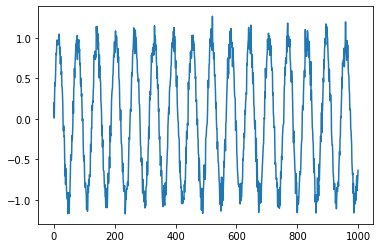

In [44]:
N = 1000
series = np.sin(0.1*np.arange(N)) + np.random.randn(N)*0.1
plt.plot(series)
plt.show()

In [45]:
len(series)

1000

In [46]:
T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y).reshape(-1, 1)
print(X.shape)
print(Y.shape)

N = len(X)
print(N)

(990, 10)
(990, 1)
990


In [47]:
model = nn.Linear(T, 1)

In [48]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [49]:
X_train = torch.from_numpy(X[:-N//2].astype(np.float32))
y_train = torch.from_numpy(Y[:-N//2].astype(np.float32))
X_test = torch.from_numpy(X[-N//2:].astype(np.float32))
y_test = torch.from_numpy(Y[-N//2:].astype(np.float32))

In [50]:
def full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test, epochs=200):
  train_losses = np.zeros(epochs)
  test_losses = np.zeros(epochs)

  for it in range(epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion (outputs, y_train)
    loss.backward()
    optimizer.step()
    train_losses[it] = loss.item()

    test_outputs = model(X_test)
    test_loss = criterion(test_outputs, y_test)
    test_losses[it] = test_loss.item()

    if (it+1) % 5 == 0:
      print(f"Epochs {it+1}/{epochs}, Train loss: {loss.item():.4f}, Test loss: {test_loss.item():.4f}")
  return train_losses, test_losses

In [51]:
train_losses, test_losses = full_gd(model, criterion, optimizer, X_train, y_train, X_test, y_test)

Epochs 5/200, Train loss: 0.0578, Test loss: 0.1085
Epochs 10/200, Train loss: 0.0502, Test loss: 0.0572
Epochs 15/200, Train loss: 0.0502, Test loss: 0.0438
Epochs 20/200, Train loss: 0.0339, Test loss: 0.0289
Epochs 25/200, Train loss: 0.0242, Test loss: 0.0196
Epochs 30/200, Train loss: 0.0206, Test loss: 0.0187
Epochs 35/200, Train loss: 0.0162, Test loss: 0.0168
Epochs 40/200, Train loss: 0.0144, Test loss: 0.0166
Epochs 45/200, Train loss: 0.0147, Test loss: 0.0171
Epochs 50/200, Train loss: 0.0146, Test loss: 0.0161
Epochs 55/200, Train loss: 0.0139, Test loss: 0.0153
Epochs 60/200, Train loss: 0.0135, Test loss: 0.0153
Epochs 65/200, Train loss: 0.0134, Test loss: 0.0152
Epochs 70/200, Train loss: 0.0132, Test loss: 0.0149
Epochs 75/200, Train loss: 0.0130, Test loss: 0.0149
Epochs 80/200, Train loss: 0.0129, Test loss: 0.0148
Epochs 85/200, Train loss: 0.0128, Test loss: 0.0147
Epochs 90/200, Train loss: 0.0127, Test loss: 0.0146
Epochs 95/200, Train loss: 0.0126, Test loss: 0

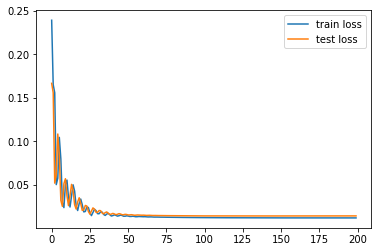

In [52]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [53]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = 0

while len(validation_predictions) < len(validation_target):
  input_ = X_test[i].view(1, -1)
  #print(input_.shape)
  p = model(input_)[0,0].item() # 1x1 array -> scalar
  #print(p)
  i += 1
  
  # update the predictions list
  validation_predictions.append(p)

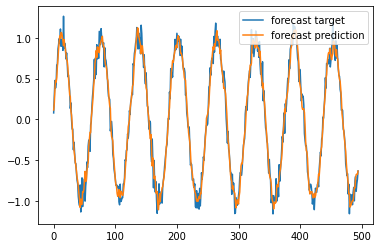

In [54]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [55]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
# 1-D array of length T
last_x = torch.from_numpy(X[-N//2].astype(np.float32))

while len(validation_predictions) < len(validation_target):
  input_ = last_x.view(1, -1)
  p = model(input_)
  #print(p.shape)
  # [0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p[0,0].item())
 
  # make the new input
  last_x = torch.cat((last_x[1:], p[0]))

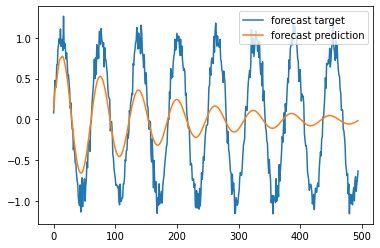

In [56]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()